In [1]:
!pip install yfinance
import yfinance as yf
import numpy as np 
import pandas as pd 
from scipy import stats as stat

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=3c350a1cc4e50953271aa3745fd322d9805bd1647c1304f4ead040fa325d53c0
  Stored in directory: c:\users\troy_hawk\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [2]:
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
stocks = ['^NSEI']
start = datetime(2004,1,1)
end = datetime(2019,1,1)
rt = yf.download(stocks,start,end)
dt = pd.DataFrame(rt)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
dte = dt
dtest = dt.iloc[-242:]
dt = dt.iloc[:-242]

<AxesSubplot:xlabel='Date'>

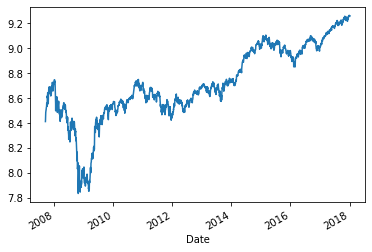

In [4]:
df_log = np.log(dt)
df_log.plot()

<AxesSubplot:xlabel='Date'>

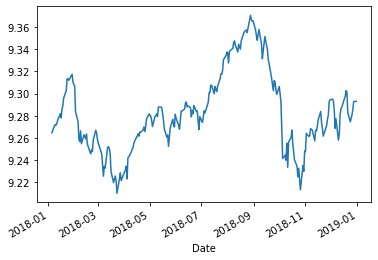

In [5]:
dtest = np.log(dtest)
dtest.plot()

<AxesSubplot:xlabel='Date'>

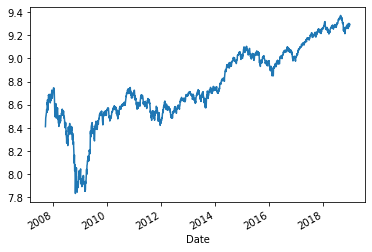

In [6]:
dte = np.log(dte)
dte.plot()

In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value',
                                        'No. of lags used',
                                        'Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_log)

Results of dickey fuller test
Test Statistics                  -0.608304
p-value                           0.869095
No. of lags used                  7.000000
Number of observations used    2510.000000
critical value (1%)              -3.432958
critical value (5%)              -2.862692
critical value (10%)             -2.567383
dtype: float64


Thus we can not reject the null hypothesis and thus, the result idicates the presence of unit root non stationarity

The random-walk model has widely been considered as a statistical model for the movement of logged stock prices. Under such a model, the stock price is not predictable or mean reverting. To see this, the 1-step-ahead forecast of model at the forecast origin h is

ph(1) = E(ph+1|ph, ph−1, . . .) = ph,

which is the log price of the stock at the forecast origin. Such a forecast has no practical value. The 2-step-ahead forecast is ph(2) = E(ph+2|ph, ph−1, . . .) = E(ph+1 + ph+2|ph, ph−1, . . .) = E(ph+1|ph, ph−1, . . .) = ph(1) = ph,

which again is the log price at the forecast origin. In fact, for any forecast horizon l > 0, we have ph(l) = ph.

Thus, for all forecast horizons, point forecasts of a random-walk model are simply the value of the series at the forecast origin. Therefore, the process is not mean reverting.

The MA representation of the random-walk model in Eq. (2.35) is

pt = at + at−1 + at−2 +··· . This representation has several important practical implications. First, the l step ahead forecast error is

ah(l) = a(h+l) + ··· + a(h+1),

so that Var[ah()] = l*σ^2 which diverges to infinity as l → ∞. The length of an interval forecast of ph+l will approach infinity as the forecast horizon-increases. This result says that the usefulness of point forecast ph(l) diminishes as l increases, which again implies that the model is not predictable. Second, the unconditional variance of pt is unbounded because Var[ah(l)] approaches infinity as increases.

Theoretically, this means that pt can assume any real value for a sufficiently large t. For the log price pt of an individual stock, this is plausible. Yet for market indexes, negative log price is very rare if it happens at all. In this sense, the adequacy of a random-walk model for market indexes is questionable.

Differencing

In [8]:
log_ret = np.log(dt) - np.log(dt.shift(1))
log_ret.dropna(inplace = True)
test_stationarity(log_ret)

Results of dickey fuller test
Test Statistics                 -19.250715
p-value                           0.000000
No. of lags used                  6.000000
Number of observations used    2510.000000
critical value (1%)              -3.432958
critical value (5%)              -2.862692
critical value (10%)             -2.567383
dtype: float64


<AxesSubplot:xlabel='Date'>

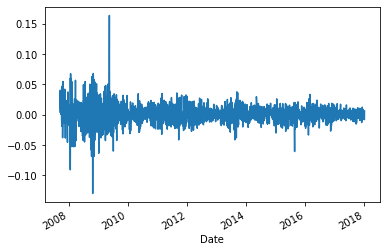

In [9]:
log_ret.plot()

In [12]:
!pip install pmdarima
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(df_log, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14142.280, Time=1.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14155.382, Time=1.74 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14156.141, Time=2.87 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14142.931, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14154.603, Time=1.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14154.974, Time=2.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14153.205, Time=6.47 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-14156.952, Time=1.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-14155.416, Time=1.34 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-14155.757, Time=1.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-14156.224, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-14158.274, Time=5.15 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-14150.973, Time=3.99 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-14156.795, Time=1.66 sec
 ARIM

In [13]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_log, order=(2, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

C:\Users\Troy_Hawk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Troy_Hawk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Troy_Hawk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Troy_Hawk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autore

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2518
Model:                 ARIMA(2, 1, 1)   Log Likelihood                7081.102
Date:                Mon, 14 Mar 2022   AIC                         -14154.203
Time:                        03:01:09   BIC                         -14130.880
Sample:                             0   HQIC                        -14145.739
                               - 2518                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0400      0.414      0.097      0.923      -0.771       0.851
ar.L2         -0.0250      0.034     -0.736      0.462      -0.091       0.042
ma.L1          0.0395      0.415      0.095      0.9

C:\Users\Troy_Hawk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


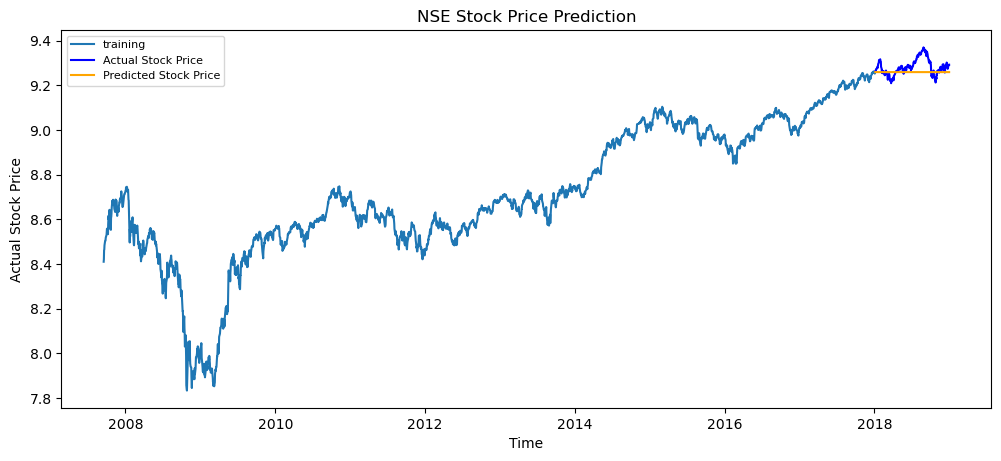

In [14]:
fc = fitted.forecast(242, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc)
fc_series.index = dtest.index
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_log, label='training')
plt.plot(dtest, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.title('NSE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [15]:
fc_series

Date
2018-01-05    9.260043
2018-01-08    9.259915
2018-01-09    9.259898
2018-01-10    9.259901
2018-01-11    9.259901
                ...   
2018-12-24    9.259901
2018-12-26    9.259901
2018-12-27    9.259901
2018-12-28    9.259901
2018-12-31    9.259901
Name: predicted_mean, Length: 242, dtype: float64

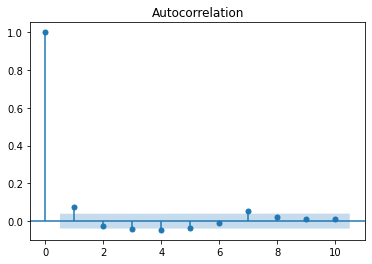

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(log_ret,lags = 10)
plt.show()

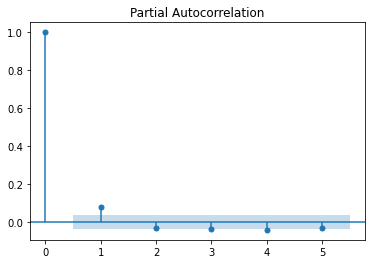

In [17]:
plot_pacf(log_ret,lags = 5)
plt.show()